### Start

In [1]:
def encode(df):
    le = preprocessing.LabelEncoder()
    le.fit(df)
    return(le.transform(df))

def normalize(df):
    return pd.Series(df).str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8').str.replace(' ','_').str.lower().str.strip().tolist()    

In [2]:
def clean(df, ano):
    df = df.drop(columns=['Unnamed: 16'])
    df.columns = normalize(df.columns)
    mask = df['orgao'].notnull()
    df = df[mask]
    
    for col in df.columns[-6:]:
        df[col] = df[col].str.replace('.','').str.replace(',','.')
        df[col] = pd.to_numeric(df[col], errors='coerce')
    
    categoria = {
        '3' :  'DESPESAS CORRENTES',
        '4' :  'DESPESAS DE CAPITAL',
        '9' :  'RESERVA DE CONTINGENCIA',
    }
    
    df['categoria'] = df['elemento'].apply(lambda x: x[:1]).replace(categoria)

    
    grupo = {
        '31' : 'PESSOAL E ENCARGOS SOCIAIS',
        '32' : 'JUROS E ENCARGOS DA DIVIDA',
        '33' : 'OUTRAS DESPESAS CORRENTES',
        '44' : 'INVESTIMENTOS',
        '45' : 'INVERSOES FINANCEIRAS',
        '46' : 'AMORTIZACAO DE DIVIDA',
        '99' : 'RESERVA DE CONTINGENCIA'
    }
    
    df['grupo'] = df['elemento'].apply(lambda x: x[:2]).replace(grupo)
    
    modalidade = {
        '3120' :  'TRANSFERENCIAS A UNIAO',
        '3190' :  'APLICACOES DIRETAS',
        '3191' :  'APLICACOES DIRETAS-INTRA ORCAMENTARIA',
        '3290' :  'APLICACOES DIRETAS',
        '3291' :  'APLICACOES DIRETAS INTRA-ORCAMENTARIAS',
        '3320' :  'TRANSFERENCIAS A UNIAO',
        '3340' :  'TRANSFERENCIAS A MUNICIPIOS',
        '3341' :  'TRANSFERENCIAS A MUNICIPIOS - FUNDO A FUNDO',
        '3350' :  'TRANSF.A INST.PRIVADAS SEM FINS LUCRATIVOS',
        '3360' :  'TRANSF.A INST.PRIVADAS COM FINS LUCRATIVOS',
        '3367' :  'EXECUCAO DE CONTRATO DE PPP',
        '3370' :  'TRANSF.A INSTIT.MULTIGOVERN.NACIONAIS',
        '3380' :  'TRANSFERENCIAS AO EXTERIOR',
        '3390' :  'APLICACOES DIRETAS',
        '3391' :  'APLICACOES DIRETAS-INTRA ORCAMENTARIAS',
        '4420' :  'TRANSFERENCIAS A UNIAO',
        '4440' :  'TRANSFERENCIAS A MUNICIPIOS',
        '4450' :  'TRANSF.A INSTIT.PRIVADAS SEM FINS LUCRATIVOS',
        '4490' :  'APLICACOES DIRETAS',
        '4491' :  'APLICACOES DIRETAS-INTRA ORCAMENTARIAS',
        '4567' :  'EXECUCAO DE CONTRATO DE PPP',
        '4590' :  'APLICACOES DIRETAS',
        '4591' :  'APLIC.DIRETAS-OP.ENTRE ENTID.INTEGR.ORCAMENT',
        '4690' :  'APLICACOES DIRETAS',
        '4691' :  'APLICACOES DIRETAS INTRA-ORCAMENTARIAS',
        '9999' :  'RESERVA DE CONTINGENCIA',

    }
    
    df['modalidade'] = df['elemento'].apply(lambda x: x[:4]).replace(modalidade)

    
    
    return(df)

### PIE Plot

In [3]:
def pie_plot(dd,label='orgao',value='valor'):
    labels = dd[label]
    values = dd[value]
    trace = go.Pie(
        labels=labels,
        values=values,
        hoverinfo='label+percent+value',
        textinfo='label+percent',
        opacity = 0.90,
        textposition='outside',
#         textposition='auto',

        marker=dict(
            line=dict(
                color='#000000',
                width=1)
        ),
    )

    layout =  dict(
        height = 300,
    #         width = 1200,
        font = dict(
          size = 10
        ),    
    )


    fig = go.Figure(data=[trace], layout=layout)
    fig.show()



### Sankey Plot

In [240]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

pd.options.display.max_colwidth = 100

import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot, offline
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

### Perfil Historico

In [71]:
df_final.head()

,orgao,uo,unidade_gestora,fonte_de_recursos,funcao,sub_funcao,programa,acao,funcional_programatica,elemento,dotacao_inicial,dotacao_atual,empenhado,liquidado,pago,pago_restos,categoria,grupo,modalidade,ano
0,ASSEMBLEIA LEGISLATIVA,01001 - ASSEMBLEIA LEGISLATIVA,010010 - ASSEMBLEIA LEGISLATIVA,001 - TESOURO-DOT.INICIAL E CRED.SUPLEMENTAR,01 - LEGISLATIVA,031 - ACAO LEGISLATIVA,0150 - PROCESSO LEGISLATIVO,"12150000 - PAL. 9 DE JULHO-REF.,CONS.,REP.,ADAP.E INST.","01031015012150000 - PAL. 9 DE JULHO-REF.,CONS.,REP.,ADAP.E INST.",OUTROS SERVICOS DE TERCEIROS,5000000.0,0.0,0.0,0.0,0.0,0.0,DESPESAS CORRENTES,OUTRAS DESPESAS CORRENTES,APLICACOES DIRETAS,2010
1,ASSEMBLEIA LEGISLATIVA,01001 - ASSEMBLEIA LEGISLATIVA,010010 - ASSEMBLEIA LEGISLATIVA,001 - TESOURO-DOT.INICIAL E CRED.SUPLEMENTAR,01 - LEGISLATIVA,031 - ACAO LEGISLATIVA,0150 - PROCESSO LEGISLATIVO,"12150000 - PAL. 9 DE JULHO-REF.,CONS.,REP.,ADAP.E INST.","01031015012150000 - PAL. 9 DE JULHO-REF.,CONS.,REP.,ADAP.E INST.",OBRAS E INSTALACOES,5000000.0,0.0,0.0,0.0,0.0,0.0,DESPESAS DE CAPITAL,INVESTIMENTOS,APLICACOES DIRETAS,2010
2,ASSEMBLEIA LEGISLATIVA,01001 - ASSEMBLEIA LEGISLATIVA,010010 - ASSEMBLEIA LEGISLATIVA,001 - TESOURO-DOT.INICIAL E CRED.SUPLEMENTAR,01 - LEGISLATIVA,031 - ACAO LEGISLATIVA,0150 - PROCESSO LEGISLATIVO,13210000 - CONSOLIDACAO DA LEGISLACAO PAULISTA,01031015013210000 - CONSOLIDACAO DA LEGISLACAO PAULISTA,OUTROS SERVICOS DE TERCEIROS,10.0,0.0,0.0,0.0,0.0,0.0,DESPESAS CORRENTES,OUTRAS DESPESAS CORRENTES,APLICACOES DIRETAS,2010
3,ASSEMBLEIA LEGISLATIVA,01001 - ASSEMBLEIA LEGISLATIVA,010010 - ASSEMBLEIA LEGISLATIVA,001 - TESOURO-DOT.INICIAL E CRED.SUPLEMENTAR,01 - LEGISLATIVA,031 - ACAO LEGISLATIVA,0150 - PROCESSO LEGISLATIVO,13430000 - ESTUDOS PESQUISAS SUBSIDIAR ATIVID. POLITICAS,01031015013430000 - ESTUDOS PESQUISAS SUBSIDIAR ATIVID. POLITICAS,OUTROS SERVICOS DE TERCEIROS,2000000.0,0.0,0.0,0.0,0.0,0.0,DESPESAS CORRENTES,OUTRAS DESPESAS CORRENTES,APLICACOES DIRETAS,2010
4,ASSEMBLEIA LEGISLATIVA,01001 - ASSEMBLEIA LEGISLATIVA,010010 - ASSEMBLEIA LEGISLATIVA,001 - TESOURO-DOT.INICIAL E CRED.SUPLEMENTAR,01 - LEGISLATIVA,031 - ACAO LEGISLATIVA,0150 - PROCESSO LEGISLATIVO,45080000 - DIVULGACAO DOS TRABALHOS LEGISLATIVOS,01031015045080000 - DIVULGACAO DOS TRABALHOS LEGISLATIVOS,MATERIAL DE CONSUMO,5000.0,0.0,0.0,0.0,0.0,0.0,DESPESAS CORRENTES,OUTRAS DESPESAS CORRENTES,APLICACOES DIRETAS,2010


In [58]:
# mater df
df_final = pd.DataFrame()

##################################################### 2010-2019 #####################################################

#years to get
anos = [str(i) for i in range(2010,2020)]

for ano in anos:
    #read year by year
    df = pd.read_csv('../data/orcamento/orcamento_{}.csv'.format(ano), encoding="ISO-8859-9")
    df_18 = clean(df,ano)

    #padronizer
    df_18['elemento'] = df_18['elemento'].str.split('-').apply(lambda x: x[1]).str.strip()
    df_18['orgao'] = df_18['orgao'].str.split('-').apply(lambda x: x[1]).str.strip()
    df_18['ano']=ano
    
    #append to final df
    df_final = pd.concat([df_final,df_18], axis=0)

#just fell cols
cols = ['ano','orgao','unidade_gestora','fonte_de_recursos','programa','acao','grupo','dotacao_inicial','empenhado']
df_total = df_final[cols]

##################################################### 2020 #####################################################

#get LOA FROM 2020 
ano = '2020'
#read file
df = pd.read_excel('../data/orcamento/orcamento_{}.xlsx'.format(ano), encoding="utf-8")
#normalize columns
df.columns = normalize(df.columns)
df_20 = df.copy()
#normalize orgaos
df_20['orgao'] = df_20['orgao'].str.split('-').apply(lambda x: x[1]).str.strip()
df_20['orgao'] = normalize(df_20['orgao'])
df_20['orgao'] = df_20['orgao'].str.replace('_',' ').str.upper()
#normalize grupos
df_20['grupo'] = df_20['grupo'].str.replace('INVESTIMENTOS','INVESTIMENTO').str.replace('INVESTIMENTO','INVESTIMENTOS').str.upper().str.strip()
df_20['grupo'] = normalize(df_20['grupo'])
df_20['grupo'] = df_20['grupo'].str.replace('_',' ').str.upper()
#create some columns
df_20['total'] = 'TOTAL'
df_20['programa']=df_20['programa'].apply(lambda x: x[18:]).str.strip()
df_20['ano'] = '2020'
#filter just some columns
df_20['empenhado']=0
cols = ['ano','orgao','unidade_gestora','fonte_de_recursos','programa','acao','grupo','dotacao_inicial','empenhado']
df_20_f = df_20[cols]

##################################################### ALL YEARS #####################################################

#create a df with all years
df_total = pd.concat([df_total,df_20_f], axis=0)

#normalize grupo and remove anomalys
df_total['grupo'] = df_total['grupo'].str.replace('AMORTIZACAO DE DIVIDA','AMORTIZACAO DA DIVIDA').str.replace('AMORTIZACAO DA DIVIDA','JUROS E ENCARGOS DA DIVIDA')
mask = df_total['grupo']!='34'
df_total = df_total[mask]

##################################################### MAP ORGAOS #####################################################
#map the diferent orgaos
orgaos_match = pd.read_excel('../data/aux/orgaos_match.xlsx')
df = pd.merge(df_total,orgaos_match, left_on='orgao',right_on='old', how='left')

#grop aux cols
df['orgao'] = df['new']
df = df.drop(columns=['old','new'])
df = df.rename(columns={'dotacao_inicial':'valor'})

In [59]:
df['mean'] = df['valor']
for ano in df.ano.unique().tolist():
    mask = df['ano']==ano
    total = df[mask]['valor'].sum()
    df['mean'] = np.where(mask, df['valor']/total, df['mean'])
    
df['percent'] =  round(df['mean']*100,2)
df['vbi'] =  round(df['valor']/10**9,2)

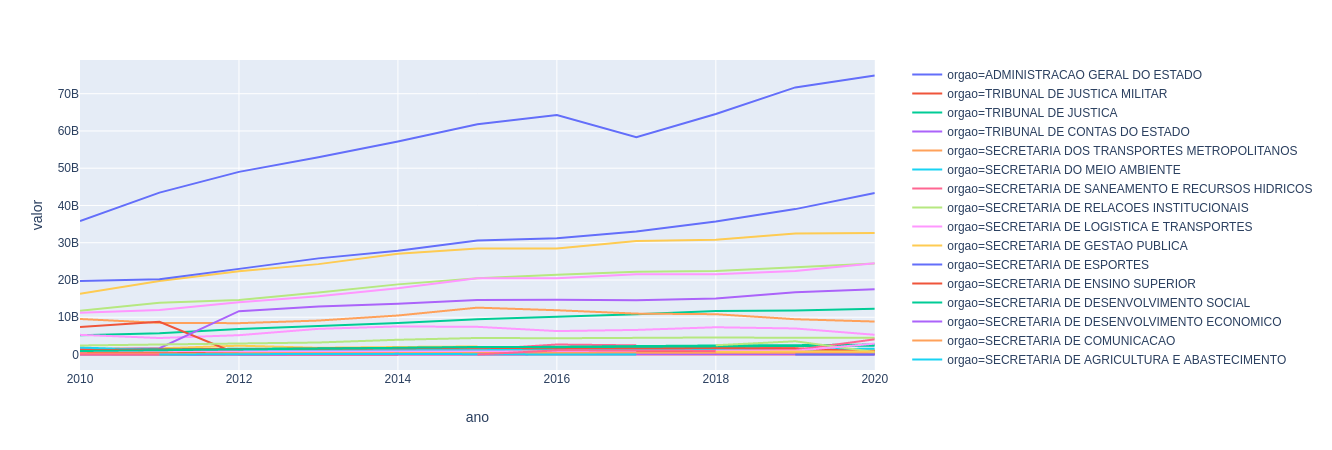

In [60]:
dd = df.groupby(by=['ano','orgao'], as_index=False).sum().sort_values(by='ano')

# mask = (dd['percent']>7)
px.line(dd, x='ano', y='valor', color='orgao')


### Line by Orgao

In [224]:
def plot_grupo_orgao(dd,label='orgao',value='valor',title="titulo"):
    if label == 'orgao':
        colors = ["#585858","#105042","#3CE4D3","#fa7609","#1D8179"]
    else:
        colors = ["#fa7609","#585858","#3CE4D3","#105042","#1D8179",'#B2B6B9']
    
    dd = dd.sort_values(by=['ano','valor'], ascending=False)
    
    data=[]
    i=0
    for orgao in dd[label].unique():
        mask = dd[label]==orgao

        trace = go.Line(
            name=orgao,
            x=dd[mask]['ano'], 
            y=dd[mask][value],
            marker=dict(
                line=dict(color=colors[i],width=4),
            ),
            line=dict(color=colors[i],width=4),
            hoverlabel=dict(namelength=-1,
                            font=dict(size=18)
                           )
        )
        data.append(trace)
        i+=1

    layout = go.Layout(
        yaxis = dict(
            tickfont=dict(
                size=18,
                color='black',
            )
        ),
        xaxis = dict(
            tickfont=dict(
                size=18,
                color='black',
            )
        ),
        title=dict(
            text='<b>{}</b>'.format(title),
            x=0.4,
            y=0.9,
            xanchor='center',
            yanchor='top',
            font = dict(
                size=22,
            )
        ),

        height = 500,

    #     width = 1200,
        legend = dict(font = dict(size = 12))

    )

    fig = go.Figure(data=data, layout=layout)
    return(fig)


In [228]:
dd = df.groupby(by=['ano','orgao'], as_index=False).sum().sort_values(by='ano')
dd['ano'] = dd['ano'].astype(int)
mask = (dd['percent']>7) & (dd['ano']>=2013)
dd = dd[mask]
title = "Dotação Anual por Órgão"
fig1 = plot_grupo_orgao(dd,title=title)

title = "Porcentagem da Dotação Anual por Órgão"
fig2 = plot_grupo_orgao(dd,value='percent' ,title=title)

# plot(fig1, filename="../images/orgao_total_anual.html", auto_open=False)
# plot(fig1, filename="../../sample_pages/images/orcamento/orgao_total_anual.html", auto_open=False)
# plot(fig2, filename="../images/orgao_percent_anual.html", auto_open=False)
# plot(fig2, filename="../../sample_pages/images/orcamento/orgao_percent_anual.html", auto_open=False)

In [230]:
dd = df.groupby(by=['ano','grupo'], as_index=False).sum().sort_values(by='ano')
dd['ano'] = dd['ano'].astype(int)
mask = (dd['ano']>=2013)
dd = dd[mask]
title = "Dotação Anual por Grupo de Despesa"
fig1 = plot_grupo_orgao(dd,label='grupo',title=title)

title = "Porcentagem da Dotação Anual por Grupo de Despesa"
fig2 = plot_grupo_orgao(dd,label='grupo',value='percent' ,title=title)

# plot(fig1, filename="../images/grupo_total_anual.html", auto_open=False)
# plot(fig1, filename="../../sample_pages/images/orcamento/grupo_total_anual.html", auto_open=False)
# plot(fig2, filename="../images/grupo_percent_anual.html", auto_open=False)
# plot(fig2, filename="../../sample_pages/images/orcamento/grupo_percent_anual.html", auto_open=False)



### Total

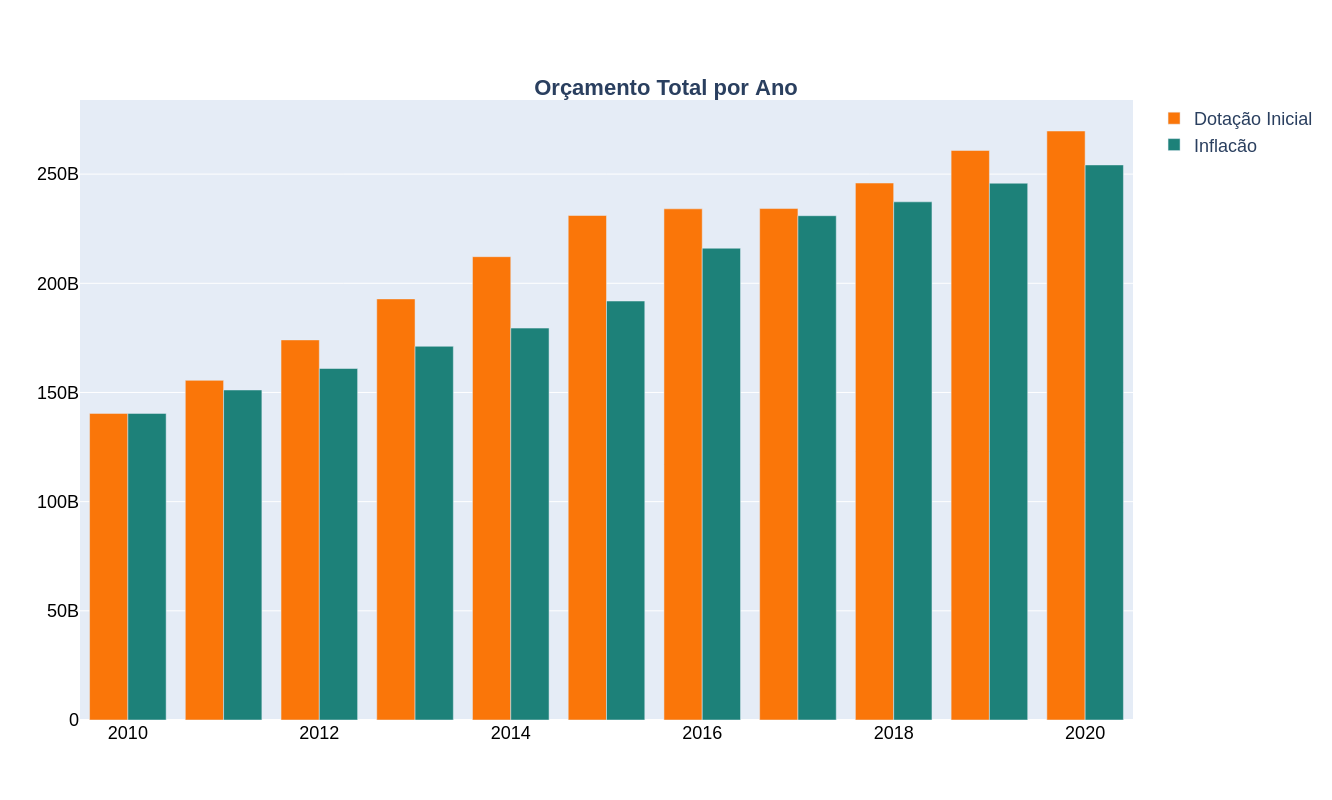

In [220]:
dd = df.groupby(by='ano', as_index=False).sum()

ajuste_inflacao = pd.read_excel('../data/inflacao/ipc_fipe.xlsx')
ajuste_inflacao['valor'] = ajuste_inflacao['valor']*10**9

trace1 = go.Bar(
    name="Dotação Inicial",
    x=dd['ano'], 
    y=dd['valor'],
    marker=dict(
        color='#fa7609',
#         line=dict(color='#0d485a', width=)
    ),
    hoverlabel=dict(namelength=-1,
                    font=dict(size=18))

    
)


trace2 = go.Bar(
    name="Inflacão",
    x=ajuste_inflacao['ano'], 
    y=ajuste_inflacao['valor'],
    marker=dict(
        color='#1d8179',
#         line=dict(color='#0d485a', width=2)
    ),
    hoverlabel=dict(namelength=-1,
                    font=dict(size=18))

)




data = [trace1,trace2]

layout = go.Layout(

    yaxis = dict(
        tickfont=dict(
            size=18,
            color='black',
        )
    ),

    xaxis = dict(
        tickfont=dict(
            size=18,
            color='black',
        )
    ),

    title=dict(
        text='<b>Orçamento Total por Ano</b>',
        x=0.5,
        y=0.9,
        xanchor='center',
        yanchor='top',
        font = dict(
            size=22,
        )
    ),

    height = 800,

#     width = 1200,
    legend = dict(font = dict(size = 18))
)
    
fig = go.Figure(data=data, layout=layout)

fig
# plot(fig, filename="../images/orcamento_total.html", auto_open=False)
# plot(fig, filename="../../sample_pages/images/orcamento/orcamento_total.html", auto_open=False)

## Perfil Anual

In [245]:
mask = df['ano']=='2020'
df_ano          = df[mask]
df_ano['total'] = 'ORCAMENTO TOTAL'


mask = df['ano']=='2019'
df_19          = df[mask]
df_19['total'] = 'ORCAMENTO TOTAL'

### Bar

### GERAL

In [246]:
def bar_plot(dd, label='orgao', value='valor',title="titulo"):
    trace1 = go.Bar(
        x=dd[value], 
        y="<b>" + dd[label] + "</b>",
        orientation='h',
        marker=dict(
            color='rgb(250, 118, 9)',
#             line=dict(color='rgb(13, 72, 90)', width=2)
        ),
        hoverlabel = dict(
            font = dict(
                size=22
            )
        )

    )

    layout = go.Layout(

        yaxis = dict(
            tickfont=dict(
                size=13,
                color='black',
            )
        ),
        
        xaxis = dict(
            tickfont=dict(
                size=18,
                color='black',
            )
        ),
        
        title=dict(
            text=title,
            x=0.6,
            y=0.9,
            xanchor='center',
            yanchor='top',
            font = dict(
                size=22,
            )
        ),
        
        height = 800,
        
    #     width = 1200
    )

    data = [trace1]

    fig = go.Figure(data=data, layout=layout)
    fig.show()
    
    return(fig)

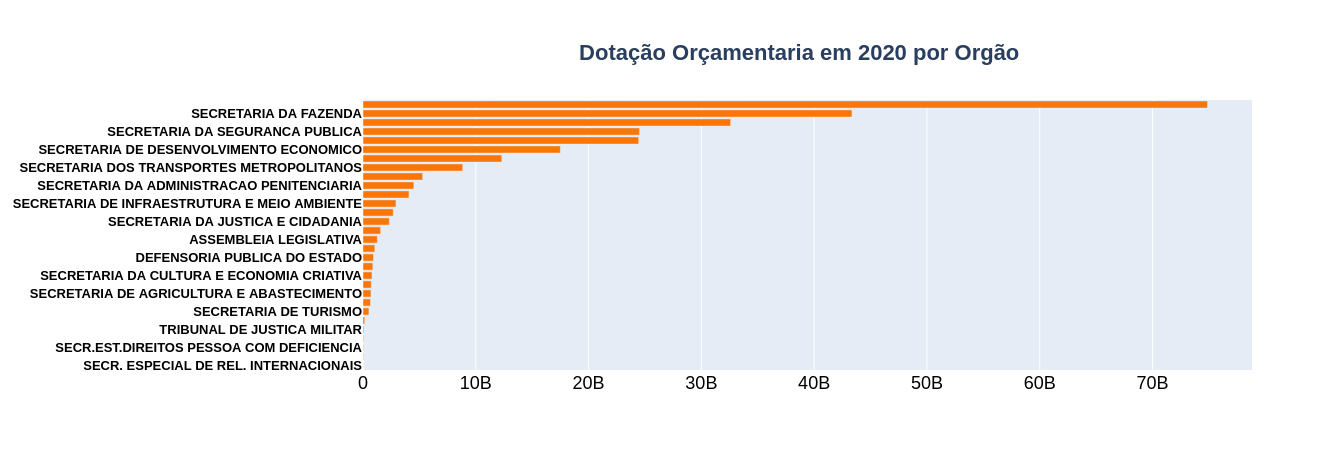

'../../sample_pages/images/orcamento/orcamento_2020_por_orgao.html'

In [85]:
dd = df_ano.groupby(by='orgao', as_index=False).sum()
# dd['valor'] = round(dd['valor'],2)

# # pie_plot(dd)
dd = dd.sort_values(by='valor')


title = '<b>Dotação Orçamentaria em 2020 por Orgão</b>'

fig = bar_plot(dd,title=title)

plot(fig, filename="../images/orcamento_2020_por_orgao.html", auto_open=False)

plot(fig, filename="../../sample_pages/images/orcamento/orcamento_2020_por_orgao.html", auto_open=False)

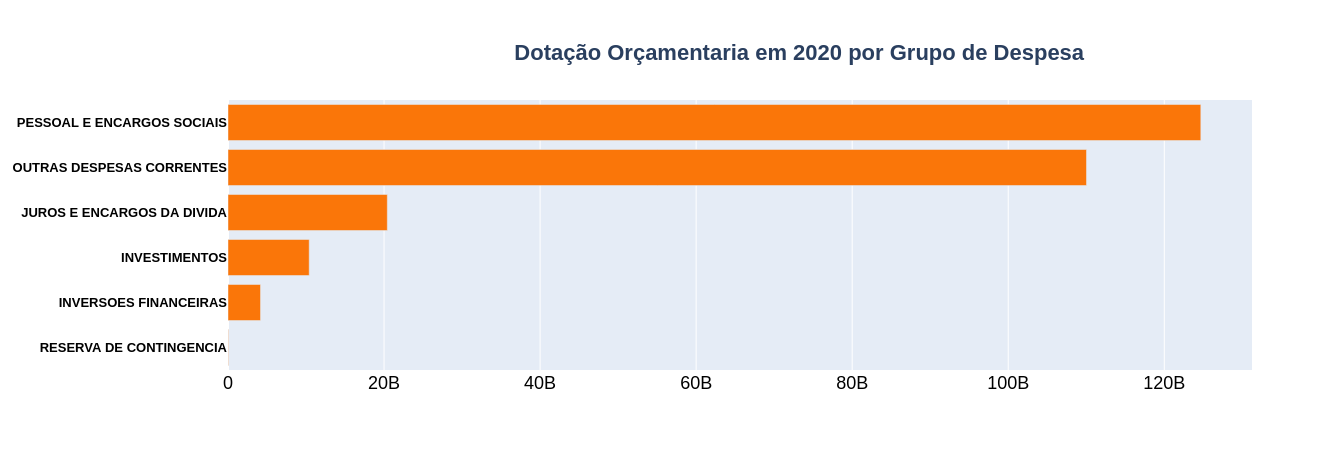

'../../sample_pages/images/orcamento/orcamento_2020_por_grupo.html'

In [86]:
dd = df_ano.groupby(by='grupo', as_index=False).sum()
dd = dd.sort_values(by='valor')

title = '<b>Dotação Orçamentaria em 2020 por Grupo de Despesa</b>'

fig = bar_plot(dd, label='grupo', title=title)
plot(fig, filename="../images/orcamento_2020_por_grupo.html", auto_open=False)
plot(fig, filename="../../sample_pages/images/orcamento/orcamento_2020_por_grupo.html", auto_open=False)

### Sankey

In [250]:
def sankey_plot(df_18,source,target,valor,xx=[],yy=[]):
    cols = source + target
    cols = list(set(cols))

    df_sankey = df_18.groupby(by = cols, as_index=False, sort=False).sum()[cols + [valor]]
    color = '#300101'

    df_sankey = df_sankey.sort_values(by=cols)
    
    
    df_final = pd.DataFrame()

    for i in range(len(source)):
        df_aux = pd.DataFrame()

        print(source[i], target[i])


        df_aux['source'] = df_sankey[source[i]]
        df_aux['target'] = df_sankey[target[i]]
        df_aux['value']  = df_sankey[valor]
        df_final = pd.concat([df_final,df_aux], axis=0)
        
    label = df_final['source'].tolist() + df_final['target'].tolist()
    # value = df_sankey['orgaos_count'].tolist() + df_sankey['grupo_count'].tolist()
    df = pd.DataFrame(label,columns = ['label'])
    # df['number'] = value
    df = df.drop_duplicates(subset='label', keep='first')
    df['number'] = [i for i in range(len(df))]
    
    df_final = pd.merge(df_final,df, left_on = ['source'], right_on=['label'], how = 'left', suffixes=('_orgao','_bla') ).rename(columns = {'number':'source_num'})
    df_final = pd.merge(df_final,df, left_on = ['target'], right_on=['label'], how = 'left', suffixes=('_orgao','_bla') ).rename(columns = {'number':'target_num'})
    
    
    
#     df['group'] = np.nan
#     for col in cols:
#         mask = df['label'].isin(df_18[col].unique())
#         df['group'] = np.where(mask,col,df['group'])
#     larg=1300
#     x_dist = 1/len(df['group'].unique())
    
#     n_dict = df['group'].value_counts().to_dict()
#     xx = []
#     i=0
#     factors=[0.1,0.3,0.95]
    
#     for grup in df['group'].unique():
#         number=n_dict[grup]
#         xi = [factors[i] for j in range(int(number))]
#         xx = xx + xi
#         i+=1
        
    ####plot####
    
    
    df_final['link']="value:" + df_final['value'].astype(str)
    
    trace1 = go.Sankey(
        orientation='h',
        arrangement = "freeform",
        
        domain={
            'x':[0,1],
            'y':[0,1],
        },
        
        node = {
            "label"     : df['label'],
            "x":xx,
            'y':yy,
            'pad'       : 10,
            'thickness' : 50,
            'line' : {
                'width' : 2,
            },
            'hoverinfo' : "all",
            
            'hoverlabel':{
                'font':{
                    'size':15
                }
            } 
            
        },  # 10 Pixels 

        
        
        link = {
            'source' : df_final['source_num'],
            'target' : df_final['target_num'],
            'value' : df_final['value'],
            'label' : df_final['link'],
            
            'hoverlabel':{
                'font':{
                    'size':15
                }
            }
        },
        
#         textfont={
#             "size":1,
#         },
        
        
        
        
    )
    
    layout =  dict(
        height = 900,
#         width = larg,
        font = dict(
          size = 10
        ),    
    )
    
    fig = go.Figure(data = trace1, layout=layout)
    
    iplot(fig) 
    return(fig, df_final, df)



In [289]:
# cols = ['orgaos','unidade','programas','acao']
source = ['orgao']
target = ['grupo']
valor  = 'valor'
xx=[]
yy=[]
# fig,df_final, df= sankey_plot(df_ano,source,target,valor,xx,yy)

# plot(fig, filename="../images/sankey/orgao_e_grupo.html", auto_open=False)
# plot(fig, filename="../../sample_pages/images/orcamento/orgao_e_grupo.html", auto_open=False)

In [266]:
df.to_excel('/home/m/Downloads/labels.xlsx', index=False)
df = df.reset_index(drop=True)

In [267]:
df_final['value'] = df_final['value'].astype(float)
df_final = df_final.reset_index(drop=True)
ddd = pd.concat([df_final,df],axis=1)

In [269]:
ddd.to_excel('/home/m/Downloads/sauce_targ.xlsx', index=False)

In [372]:
# cols = ['orgaos','unidade','programas','acao']
source = ['total']
target = ['orgao']
valor  = 'valor'

# sankey_plot(df_ano,source,target,valor)

### ADM GERAL

In [384]:
mask = df_ano['orgao']=='ADMINISTRACAO GERAL DO ESTADO'
educacao = df_ano[mask]

# cols = ['orgaos','unidade','programas','acao']
source = ['orgao','grupo']
target = ['grupo','acao']
valor  = 'valor'

# fig =  sankey_plot(educacao,source,target,valor)



# plot(fig, filename="../images/sankey/adm_geral_estado.html", auto_open=False)
# plot(fig, filename="../../sample_pages/images/orcamento/adm_geral_estado.html", auto_open=False)

### Alesp

In [385]:
mask = df_ano['orgao']=='ASSEMBLEIA LEGISLATIVA'
educacao = df_ano[mask]

# cols = ['orgaos','unidade','programas','acao']
source = ['orgao','grupo']
target = ['grupo','acao']
valor  = 'valor'


xx=[]
yy=[]

# fig =  sankey_plot(educacao,source,target,valor,xx,yy)



# plot(fig, filename="../images/sankey/alesp.html", auto_open=False)
# plot(fig, filename="../../sample_pages/images/orcamento/alesp.html", auto_open=False)

### TCESP

In [413]:
mask = df_ano['orgao']=='TRIBUNAL DE CONTAS DO ESTADO'
educacao = df_ano[mask]

# cols = ['orgaos','unidade','programas','acao']
source = ['orgao','grupo']
target = ['grupo','acao']
valor  = 'valor'


xx=[]
yy=[]

# fig =  sankey_plot(educacao,source,target,valor,xx,yy)



# plot(fig, filename="../images/sankey/tcesp.html", auto_open=False)
# plot(fig, filename="../../sample_pages/images/orcamento/tcesp.html", auto_open=False)

### MPSP

In [ ]:
mask = df_ano['orgao']=='MINISTERIO PUBLICO'
educacao = df_ano[mask]

# cols = ['orgaos','unidade','programas','acao']
source = ['orgao','grupo']
target = ['grupo','acao']
valor  = 'valor'


xx=[]
yy=[]

# fig =  sankey_plot(educacao,source,target,valor,xx,yy)



# plot(fig, filename="../images/sankey/mpsp.html", auto_open=False)
# plot(fig, filename="../../sample_pages/images/orcamento/mpsp.html", auto_open=False)

### TJSP

In [407]:
mask = df_ano['orgao']=='TRIBUNAL DE CONTAS DO ESTADO'
educacao = df_ano[mask]

# cols = ['orgaos','unidade','programas','acao']
source = ['orgao','grupo']
target = ['grupo','acao']
valor  = 'valor'


xx=[]
yy=[]

# fig =  sankey_plot(educacao,source,target,valor,xx,yy)



# plot(fig, filename="../images/sankey/tjsp.html", auto_open=False)
# plot(fig, filename="../../sample_pages/images/orcamento/tjsp.html", auto_open=False)

### Educacao

In [293]:
mask = df_ano['orgao']=='SECRETARIA DA EDUCACAO'
educacao = df_ano[mask]

# cols = ['orgaos','unidade','programas','acao']
source = ['orgao','grupo']
target = ['grupo','acao']
valor  = 'valor'

xx=[0,0.3,0.3,0.3]
yy=[0,0.65,0.82,0.3]

# fig, df_final, df =  sankey_plot(educacao,source,target,valor,xx,yy)

# fig



# plot(fig, filename="../images/sankey/educacao.html", auto_open=False)
# plot(fig, filename="../../sample_pages/images/orcamento/educacao.html", auto_open=False)

### Saude

In [387]:
mask = df_ano['orgao']=='SECRETARIA DA SAUDE'
educacao = df_ano[mask]

# cols = ['orgaos','unidade','programas','acao']
source = ['orgao','grupo']
target = ['grupo','acao']
valor  = 'valor'


xx = [0, 0.3 , 0.3, 0.3, 0.3]
yy = [0, 0.3, 0.49, 0.56, 0.6]
# fig =  sankey_plot(educacao,source,target,valor,xx,yy)



# plot(fig, filename="../images/sankey/saude.html", auto_open=False)
# plot(fig, filename="../../sample_pages/images/orcamento/saude.html", auto_open=False)

### Seguranca

orgao grupo
grupo acao


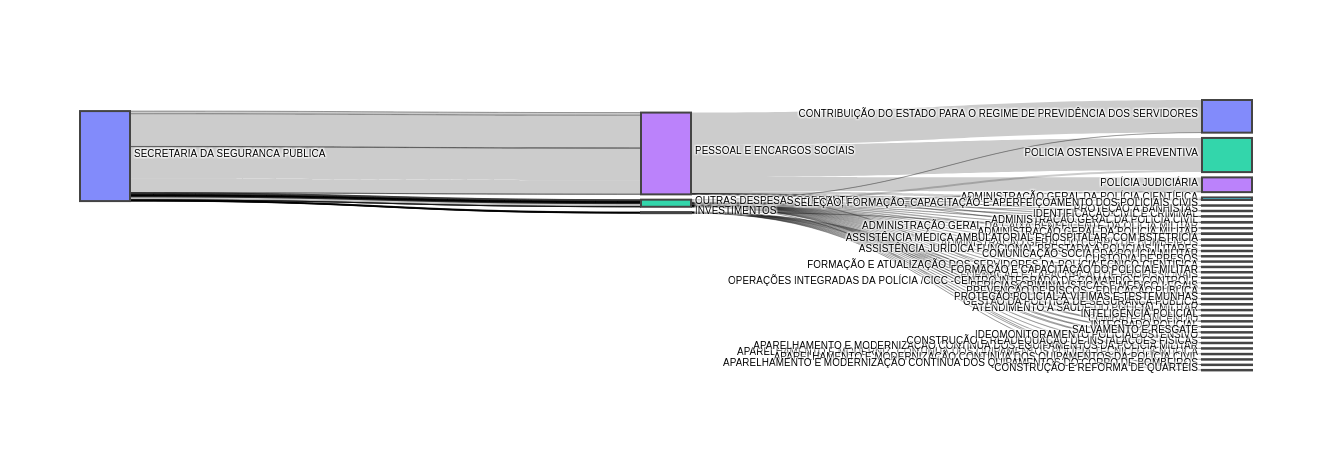

In [425]:
mask = df_ano['orgao']=='SECRETARIA DA SEGURANCA PUBLICA'
educacao = df_ano[mask]

# cols = ['orgaos','unidade','programas','acao']
source = ['orgao','grupo']
target = ['grupo','acao']
valor  = 'valor'


# xx = [0.05, 0.3 , 0.3, 0.3]
# yy = [0.5, 0.37+0.3, 0.4+0.3,0.19+0.3]
xx=[]
yy=[]
fig =  sankey_plot(educacao,source,target,valor,xx,yy)



# plot(fig, filename="../images/sankey/ssp.html", auto_open=False)
# plot(fig, filename="../../sample_pages/images/orcamento/ssp.html", auto_open=False)

### Previdencia

In [417]:
dd = df_ano.copy()
mask = (dd['programa'].str.contains('PREVI')) | (dd['acao'].str.contains('PREVI'))
educacao = dd[mask]

# cols = ['orgaos','unidade','programas','acao']
source = ['orgao','grupo']
target = ['grupo','acao']
valor  = 'valor'


xx = []
yy = []
# fig =  sankey_plot(educacao,source,target,valor,xx,yy)



# plot(fig, filename="../images/sankey/previdencia.html", auto_open=False)
# plot(fig, filename="../../sample_pages/images/orcamento/previdencia.html", auto_open=False)

### Transparencia

orgao grupo
grupo programa


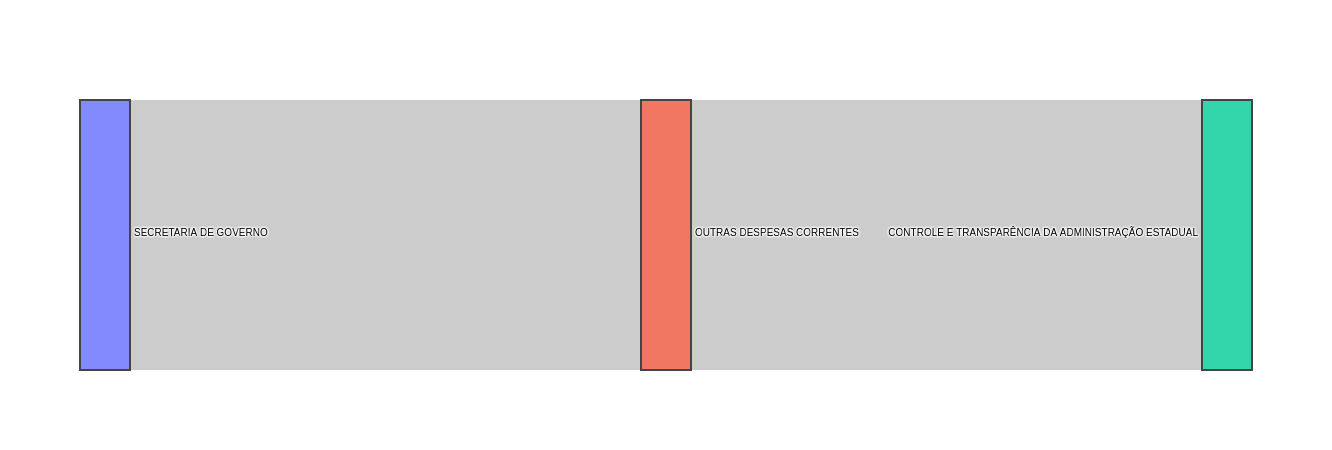

In [420]:
dd = df_ano.copy()

mask = (dd['programa'].str.contains('TRANSPARÊNCIA')) | (dd['acao'].str.contains('TRANSPARÊNCIA'))


# cols = ['orgaos','unidade','programas','acao']
source = ['orgao','grupo']
target = ['grupo','programa']
valor  = 'valor'

fig = sankey_plot(dd[mask],source,target,valor)


In [92]:
linkLabel

['An armed Predator mysteriously vanished in<br>Afghanistan about 5 hours into a flight. The skies<br>were clear and the aircraft was flying well above<br>a mountain range when the return satellite data<br>link was lost to Creech Air Force Base in Nevada.<br>The transponder signal was lost three minutes<br>later. Investigators concluded that there was no<br>evidence of bad weather, icing, fuel loss or pilot<br>error. A sergeant raised the possibility that the<br>aircraft could have had its satellite links hacked<br>or hijacked, saying: "If somebody else was on the<br>same frequencies, they could have taken over the<br>aircraft or just knocked it out completely."<br>Investigators found no evidence of hacking.<br><br>Damage: $3,900,000<br>',
 "An armed Predator crashed and skidded off the<br>runway after it landed nose-first and bounced in<br>the air seven times. Investigators blamed the<br>pilot, saying he misjudged the height above<br>touchdown and mistakenly thought the bouncing was<b